In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
pd.set_option('display.max_colwidth', 200)
us_topics = pd.read_csv('data/cdc_npao_topics_us.csv')
us_data = pd.read_csv('data/cdc_npao_us.csv')

In [3]:
us_topics.head(1)

,Class,Topic,Question,Short_Desc,ClassID,TopicID,QuestionID
0,Fruits and Vegetables,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit less than one time daily,NoFruit,FV,FV1,Q018


In [4]:
us_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

In [5]:
us_data = us_data.drop(['LocationAbbr', 'Datasource', 'Data_Value_Unit', 'Data_Value_Footnote_Symbol', 
                        'Data_Value_Footnote','YearEnd', 'Class','Topic','Data_Value_Type','ClassID',
                       'TopicID','QuestionID','DataValueTypeID','StratificationCategoryId1'],1)

q = ['Percent of adults aged 18 years and older who have obesity']

In [6]:
us_data.head(2)

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
0,2011,Alabama,Percent of adults aged 18 years and older who have obesity,32.0,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Total,Total,OVERALL
1,2011,Alabama,Percent of adults aged 18 years and older who have obesity,32.3,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Male,MALE


In [34]:
test1 = us_data[(us_data['YearStart'] == 2011)&(us_data['Question'] == q[0])&(us_data['StratificationID1'] == 'OVERALL')]
    
test1[test1['LocationDesc']=='National']['Sample_Size']

18264    470700.0
Name: Sample_Size, dtype: float64

In [40]:
#finding the national female obseity % for each year, 2011 - 2015
#finding national female %obesity mean across all years
n_female_fiveyr = us_data[(us_data['LocationDesc'] == 'National')&(us_data['Question'] == q[0])
                        &(us_data['StratificationID1'] == 'FEMALE')]
n_female_fiveyr.set_index('YearStart', inplace = True)
n_female_fiveyr = n_female_fiveyr.sort_index()
n_female_fiveyr_lst = n_female_fiveyr['Data_Value'].values.tolist()
n_female_fiveyr['Data_Value'].mean() #national female %obesity mean

28.04

In [45]:
#finding the national male obseity % for each year, 2011 - 2015
#finding national male %obeisty mean across all years
n_male_fiveyr = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) 
        & (us_data['StratificationCategory1'] == 'Gender') & (us_data['Stratification1'] == 'Male')]
n_male_fiveyr.set_index('YearStart', inplace = True)
n_male_fiveyr = n_male_fiveyr.sort_index()
n_male_fiveyr_lst = n_male_fiveyr['Data_Value'].values.tolist()
n_male_fiveyr['Data_Value'].mean() #national male %obesity mean

28.439999999999998

In [53]:
#finding the national %obesity mean based on male & female
sum(n_female_fiveyr_lst + n_male_fiveyr_lst)/len(n_female_fiveyr_lst + n_male_fiveyr_lst)

28.240000000000002

In [54]:
#finding the national adult obseity % for each year, 2011 - 2015
national_ob = us_data[(us_data['LocationDesc'] == 'National') & (us_data['Question'] == q[0]) & 
                     (us_data['StratificationCategory1'] == 'Total')]
national_ob.set_index('YearStart', inplace = True)
national_ob = national_ob.sort_index()
national_ob_lst = national_ob['Data_Value'].values.tolist()
national_ob['Data_Value'].mean() #this matches the male & female mean

28.24

Text(0.5,1,'% of Adults Who Have Obesity in the US, 2011-2015')

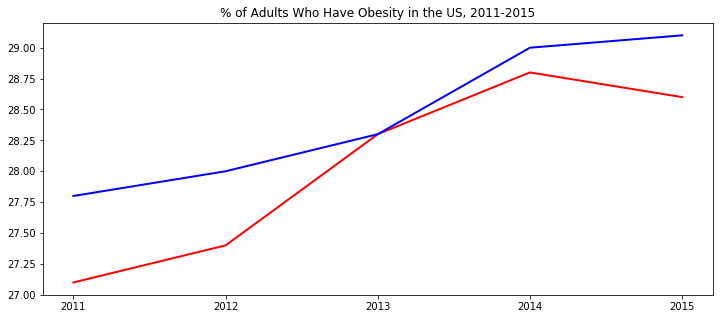

In [58]:
fig, ax = plt.subplots(figsize = (12, 5))
x = n_female_fiveyr['Data_Value'].index.values
y_f = n_female_fiveyr['Data_Value'].values
y_m = n_male_fiveyr['Data_Value'].values
ax.plot(x, y_f, linewidth=2, color='red')
ax.plot(x, y_m, linewidth=2, color='blue')

ax.set_xticks(x)
ax.set_title('% of Adults Who Have Obesity in the US, 2011-2015')

### Finding national % of adults with obesity, comparing to all states across all years

In [11]:
national_ob.head()

,YearStart,LocationDesc,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
YearEnd,,,,,,,,,,,,,,,,,,,,,
2011,2011,National,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,27.4,27.4,27.2,27.7,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL
2012,2012,National,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,27.7,27.7,27.4,28.0,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL
2013,2013,National,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,28.3,28.3,28.0,28.6,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL
2014,2014,National,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,28.9,28.9,28.6,29.2,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL
2015,2015,National,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,28.9,28.9,28.6,29.1,...,NaN,OWS,OWS1,Q036,VALUE,59,Total,Total,OVR,OVERALL


In [81]:
#2011 %obseity weighted mean across all states using 'total'
df_wt_11 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2011) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2011_mean = (df_wt_11['Data_Value']*df_wt_11['Sample_Size']).sum()/df_wt_11['Sample_Size'].sum()
n_2011_mean

27.43593392819205

In [88]:
#2012 %obseity weighted mean across all states using 'total'
df_wt_12 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2012) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2012_mean = (df_wt_12['Data_Value']*df_wt_12['Sample_Size']).sum()/df_wt_12['Sample_Size'].sum()
n_2012_mean

27.817704814236933

In [89]:
#2013 %obseity weighted mean across all states using 'total'
df_wt_13 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2013) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2013_mean = (df_wt_13['Data_Value']*df_wt_13['Sample_Size']).sum()/df_wt_13['Sample_Size'].sum()
n_2013_mean

28.317782661160628

In [90]:
#2014 %obseity weighted mean across all states using 'total'
df_wt_14 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2014) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2014_mean = (df_wt_14['Data_Value']*df_wt_14['Sample_Size']).sum()/df_wt_14['Sample_Size'].sum()
n_2014_mean

29.044841118049632

In [94]:
#2015 %obseity weighted mean across all states using 'total'
df_wt_15 = us_data[(us_data['Question'] == q[0]) & 
               (us_data['YearStart'] == 2015) & 
               (us_data['StratificationCategory1'] == 'Total') & 
              ~(us_data['LocationDesc'] == 'National')]


n_2015_mean = (df_wt_15['Data_Value']*df_wt_15['Sample_Size']).sum()/df_wt_15['Sample_Size'].sum()
n_2015_mean

29.072455302697392

In [95]:
def find_national_mean(df, year:int, q):
    df_1 = df[(df['LocationDesc']=='National')]
    df_2 = df_1[(df_1['Question'] == q[0]) & (df_1['YearStart'] == year) & (df_1['StratificationCategory1'] == 'Total')]
    return df_2['Data_Value'].values


In [96]:
n_mean = [] #list of national mean %obesity from 2011 - 2015
for i in range(2011, 2016):
    n_mean.append(find_national_mean(us_data, i, q))

In [97]:
n_mean

[array([27.4]), array([27.7]), array([28.3]), array([28.9]), array([28.9])]

In [98]:
# finding top/bottom 5 states of obseity for each year% 

def find_state_mean(df, year, q):
    df_filtered = df[~(df['LocationDesc']=='National')]
    df_2 = df_filtered[(df_filtered['Question'] == q[0]) & (df_filtered['YearStart'] == year) & (df_filtered['StratificationCategory1'] == 'Total')]
    return df_2[['LocationDesc','Data_Value']].sort_values(['Data_Value'], ascending = True)

In [102]:
#%obesity mean for all states in different years
state_2011 = find_state_mean(us_data, 2011, q)
state_2012 = find_state_mean(us_data, 2012, q)
state_2013 = find_state_mean(us_data, 2013, q)
state_2014 = find_state_mean(us_data, 2014, q)
state_2015 = find_state_mean(us_data, 2015, q)

state_2015.head()

,LocationDesc,Data_Value
46058,Colorado,20.2
46222,District of Columbia,22.1
46388,Hawaii,22.7
47226,Montana,23.6
46004,California,24.2


In [104]:
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

dfs[4].iloc[:5,1] #getting the top 5 state with the least %obesity in their populaiton for 2015

46058    20.2
46222    22.1
46388    22.7
47226    23.6
46004    24.2
Name: Data_Value, dtype: float64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

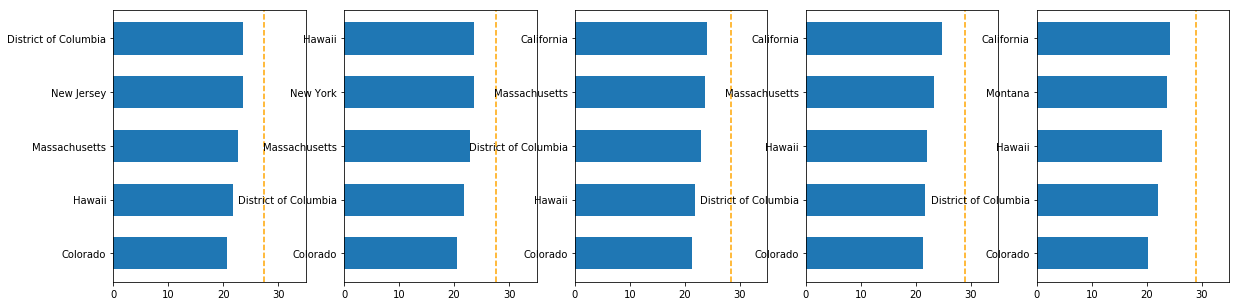

In [107]:
#5 least obese states for years 2011 to 2015, weighted national avg for each year is marked in orange
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

fig, axs = plt.subplots(1,5, figsize = (20,5))
x = np.linspace(20, 37, num=16)

for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[:5,0], dfs[idx].iloc[:5,1], height=0.6)
    ax.axvline(n_mean[idx], linestyle='--', color='orange')
    ax.set_xlim(None, 35)

plt.tight_layout


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

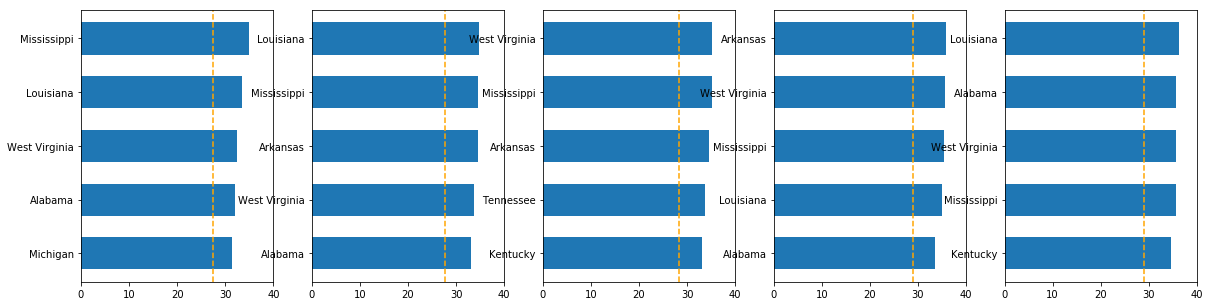

In [108]:
#5 most obese states from 2011 to 2015, weighted national avg for each year is marked in orange
dfs = [state_2011, state_2012, state_2013, state_2014, state_2015]    

fig, axs = plt.subplots(1,5, figsize = (20,5))
x = np.linspace(20, 37, num=16)

for idx, ax in enumerate(axs.flatten()):
    ax.barh(dfs[idx].iloc[-5:,0], dfs[idx].iloc[-5:,1], height=0.6)
    ax.axvline(n_mean[idx], linestyle='--', color='orange')
    ax.set_xlim(None, 40)

plt.tight_layout

### GENDER

In [114]:
#focusing on gender, excluding 'National', 'Guam', 'Puerto Rico' 
us_gender = us_data[(us_data['Question'] == q[0]) & (us_data['StratificationCategory1'] == 'Gender') 
                    & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                    &~(us_data['LocationDesc']=='Puerto Rico')]

In [118]:
#
us_gender[us_gender['Stratification1'] == 'Female']

,YearStart,LocationDesc,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,LocationID,StratificationCategory1,Stratification1,StratificationID1
2,2011,Alabama,Percent of adults aged 18 years and older who have obesity,31.8,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female,FEMALE
256,2012,Alabama,Percent of adults aged 18 years and older who have obesity,34.1,34.1,32.3,35.9,5635.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female,FEMALE
299,2014,Alabama,Percent of adults aged 18 years and older who have obesity,32.9,32.9,31.2,34.8,5156.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female,FEMALE
342,2013,Alabama,Percent of adults aged 18 years and older who have obesity,34.0,34.0,31.9,36.0,4065.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",1,Gender,Female,FEMALE
683,2011,Alaska,Percent of adults aged 18 years and older who have obesity,26.7,26.7,23.9,29.7,1716.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.84507995700051, -147.72205903599973)",2,Gender,Female,FEMALE
938,2012,Alaska,Percent of adults aged 18 years and older who have obesity,25.4,25.4,23.0,28.0,2136.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.84507995700051, -147.72205903599973)",2,Gender,Female,FEMALE
1020,2013,Alaska,Percent of adults aged 18 years and older who have obesity,27.5,27.5,24.8,30.4,2303.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.84507995700051, -147.72205903599973)",2,Gender,Female,FEMALE
1271,2014,Alaska,Percent of adults aged 18 years and older who have obesity,30.2,30.2,27.4,33.0,2221.0,NaN,NaN,NaN,Female,NaN,NaN,"(64.84507995700051, -147.72205903599973)",2,Gender,Female,FEMALE
1355,2011,Arizona,Percent of adults aged 18 years and older who have obesity,25.8,25.8,22.9,29.0,3676.0,NaN,NaN,NaN,Female,NaN,NaN,"(34.865970280000454, -111.76381127699972)",4,Gender,Female,FEMALE
1607,2012,Arizona,Percent of adults aged 18 years and older who have obesity,25.6,25.6,23.3,28.1,4003.0,NaN,NaN,NaN,Female,NaN,NaN,"(34.865970280000454, -111.76381127699972)",4,Gender,Female,FEMALE


(array([ 7.,  7., 38., 38., 37., 49., 36., 24., 10.,  9.]),
 array([18.7 , 20.62, 22.54, 24.46, 26.38, 28.3 , 30.22, 32.14, 34.06,
        35.98, 37.9 ]),
 <a list of 10 Patch objects>)

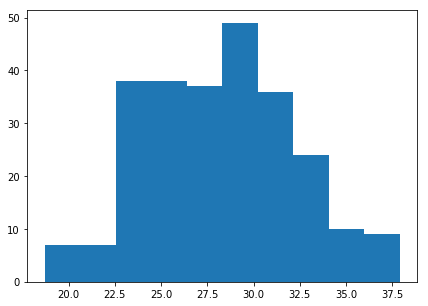

In [27]:
us_gender_female = us_gender[us_gender['Stratification1'] == 'Female']
female_obesity = us_gender_female['Data_Value'].values

bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(female_obesity)


In [28]:
us_gender_female.head()

,YearStart,YearEnd,LocationDesc,Class,Topic,Question,Data_Value_Type,Data_Value,Data_Value_Alt,Low_Confidence_Limit,...,Race/Ethnicity,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
2,2011,2011,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,31.8,31.8,30.0,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
256,2012,2012,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,34.1,34.1,32.3,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
299,2014,2014,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,32.9,32.9,31.2,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
342,2013,2013,Alabama,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,34.0,34.0,31.9,...,NaN,OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
683,2011,2011,Alaska,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who have obesity,Value,26.7,26.7,23.9,...,NaN,OWS,OWS1,Q036,VALUE,2,Gender,Female,GEN,FEMALE


(array([ 4.,  5.,  4., 25., 41., 65., 52., 35., 20.,  4.]),
 array([17.6 , 19.58, 21.56, 23.54, 25.52, 27.5 , 29.48, 31.46, 33.44,
        35.42, 37.4 ]),
 <a list of 10 Patch objects>)

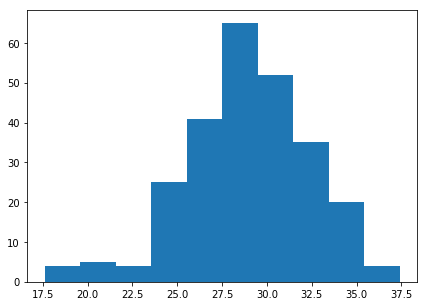

In [29]:
us_gender_male = us_gender[us_gender['Stratification1'] == 'Male']
male_obesity = us_gender_male['Data_Value'].values

#bins = [20,25,30,35,40]
#x = np.linspace(19,40,num=25)
fig, ax = plt.subplots(figsize = (7,5))
ax.hist(male_obesity)


In [30]:
us_gender_male['Data_Value'].describe()

count    255.000000
mean      28.837255
std        3.448151
min       17.600000
25%       26.600000
50%       28.900000
75%       31.100000
max       37.400000
Name: Data_Value, dtype: float64

### INCOME 

In [31]:
us_obesity_income = us_data[(us_data['StratificationCategory1'] == 'Income') & (us_data['Question'] == q) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]
us_obesity_income = us_obesity_income.reset_index(drop = True)

In [32]:
obesity_income_2013 = us_obesity_income[us_obesity_income['YearStart']==2013]
obesity_income_2013 = obesity_income_2013[['YearStart','LocationDesc','Data_Value','Stratification1']]
obesity_income_2013 = obesity_income_2013[~(obesity_income_2013['Stratification1']=='Data not reported')]
# us_obesity_income_2011.reset_index(drop = True)
obesity_income_2013_g = obesity_income_2013.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
obesity_income_2013_g = obesity_income_2013_g.reset_index()
obesity_income_2013_g.rename(columns={"Stratification1": "Income_Level", "Data_Value": "2013_%Obesity"})

,Income_Level,2013_%Obesity
0,"$75,000 or greater",25.137255
1,"$50,000 - $74,999",29.139216
2,"$35,000 - $49,999",29.976471
3,"$25,000 - $34,999",30.168627
4,"$15,000 - $24,999",32.284314
5,"Less than $15,000",33.145098


In [33]:
def obesity_income(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['YearStart','LocationDesc','Data_Value','Stratification1']]
    df1 = df1[~(df1['Stratification1']=='Data not reported')]
    df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
    df1_g = df1_g.reset_index()
    df1_g.rename(columns={"Stratification1": "Income_Level", "Data_Value": str(year)+"_%Obesity"}, inplace=True)
    
    return df1_g

income_2011 = obesity_income(us_obesity_income, 2011)
income_2012 = obesity_income(us_obesity_income, 2012)
income_2013 = obesity_income(us_obesity_income, 2013)
income_2014 = obesity_income(us_obesity_income, 2014)
income_2015 = obesity_income(us_obesity_income, 2015)
df_income = income_2011.set_index('Income_Level').join(income_2012.set_index(
    'Income_Level')).join(income_2013.set_index('Income_Level')).join(income_2014.set_index('Income_Level')).join(income_2015.set_index('Income_Level'))

In [34]:
df_income['Total_Avg'] = df_income.mean(axis=1)
df_income

,2011_%Obesity,2012_%Obesity,2013_%Obesity,2014_%Obesity,2015_%Obesity,Total_Avg
Income_Level,,,,,,
"$75,000 or greater",23.760784,24.425490,25.137255,25.800000,25.811765,24.987059
"$50,000 - $74,999",28.398039,28.952941,29.139216,30.031373,30.452941,29.394902
"$35,000 - $49,999",28.927451,29.123529,29.976471,31.192157,30.921569,30.028235
"$25,000 - $34,999",29.517647,29.084314,30.168627,30.752941,32.066667,30.318039
"$15,000 - $24,999",30.970588,31.117647,32.284314,32.496078,33.284314,32.030588
"Less than $15,000",32.343137,32.715686,33.145098,34.937255,35.086275,33.645490


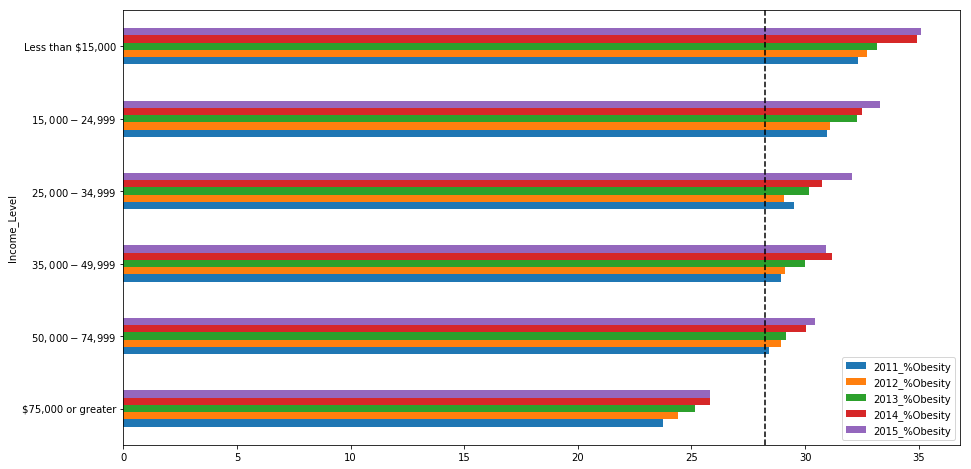

In [35]:
from statistics import mean 

inc_level = ['>75,000','50,000−74,999','35,000−49,999','25,000−34,999','15,000−24,999','<15,000']
# inc_2011 = df_income['2011_%Obesity'].values
# inc_2012 = df_income['2012_%Obesity'].values
# inc_2013 = df_income['2013_%Obesity'].values
# inc_2014 = df_income['2014_%Obesity'].values
# inc_2015 = df_income['2015_%Obesity'].values
income_mean = sum(n_mean)/len(n_mean)
df_income_plt = df_income.iloc[:,:5]
ax = df_income_plt.plot.barh(figsize = (15, 8))
ax.axvline(income_mean, linestyle='--', color='black')
# df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)
# >>> ax = df.plot.barh()

### hypothesis testing

In [49]:

us_obesity_income = us_obesity_income[['YearStart','LocationDesc','Data_Value','Stratification1']]
us_obesity_income["Stratification1"] = us_obesity_income["Stratification1"].astype(str)
us_obesity_income['Stratification1'] = us_obesity_income['Stratification1'].str.replace('$','')

ob_lowinc = us_obesity_income[(us_obesity_income['Stratification1'
                                                ] == 'Less than 15,000') | (us_obesity_income['Stratification1'] == '15,000 - 24,999')]

In [51]:
ob_lowinc_d = ob_lowinc.drop('Stratification1', axis=1)
ob_lowinc_d['Data_Value'].unique()

array([38.5, 34.8, 40.8, 35.2, 37.2, 36.6, 34.5, 40.6, 33.6, 30.2, 29.4,
       24.2, 29.3, 32.7, 31.5, 29.6, 34.1, 32.3, 31.1, 29.1, 32.4, 33.7,
       34.6, 33.8, 30.4, 37.6, 41.5, 35.3, 42.8, 36.5, 29.9, 30.1, 29.7,
       27.4, 30. , 25.9, 23.7, 22.2, 28.2, 27.1, 23.5, 31.7, 28.7, 35.5,
       30.8, 34. , 30.9, 33.5, 35.6, 32. , 36.3, 41.6, 26.8, 28.5, 35.1,
       27.5, 31.8, 29.8, 27.2, 33.9, 33.2, 33. , 35.8, 33.4, 39.7, 23.1,
       21.2, 27.3, 25.3, 20.6, 26. , 27. , 23.9, 29. , 28. , 27.7, 32.1,
       31.4, 34.7, 28.6, 32.6, 35. , 36.9, 37.1, 40.3, 37.4, 32.8, 34.2,
       38.1, 35.4, 36.7, 44.5, 38.2, 36.8, 40. , 36.1, 31.9, 32.2, 31. ,
       30.3, 32.9, 37.3, 36.4, 26.1, 28.3, 33.3, 28.4, 37. , 32.5, 23.3,
       39.9, 40.5, 37.9, 41.2, 40.7, 41.4, 39.5, 31.2, 25.6, 27.9, 26.4,
       29.2, 31.6, 24.6, 26.5, 25.1, 26.9, 35.9, 29.5, 28.8, 27.6, 31.3,
       30.5, 24.7, 28.9, 34.3, 26.6, 42.1, 30.7, 42. , 24.1, 30.6, 39.1,
       36.2, 37.7, 38. , 41.1, 28.1, 25.4, 26.3, 33

(array([  5.,  18.,  42.,  84.,  83., 107., 104.,  33.,  29.,   5.]),
 array([20.6 , 22.99, 25.38, 27.77, 30.16, 32.55, 34.94, 37.33, 39.72,
        42.11, 44.5 ]),
 <a list of 10 Patch objects>)

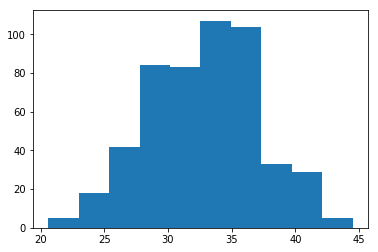

In [52]:

plt.hist(ob_lowinc_d['Data_Value'].values)

### EDUCATION

In [39]:
edu_obes = us_data[(us_data['StratificationCategory1'] == 'Education') & (us_data['Question'] == q) 
                            & ~(us_data['LocationDesc']=='National')&~(us_data['LocationDesc']=='Guam')
                            &~(us_data['LocationDesc']=='Puerto Rico')]

edu_obes = edu_obes.reset_index(drop = True)

In [40]:
edu = edu_obes[edu_obes['YearStart']==2013]
edu = edu[['YearStart','LocationDesc','Data_Value','Stratification1']]
edu = edu.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
edu = edu.reset_index()

edu.rename(columns={"Stratification1": "Education_Level", "Data_Value": "2013_%Obesity"})                                     
                                      
                                      


,Education_Level,2013_%Obesity
0,College graduate,22.400000
1,Some college or technical school,30.094118
2,High school graduate,30.705882
3,Less than high school,33.107843


In [41]:
#function for a df focusing on education level and %obesity for years 2011-2015
def obesity_edu(df, year):
    df1 = df[df['YearStart']==year]
    df1 = df1[['YearStart','LocationDesc','Data_Value','Stratification1']]
    df1_g = df1.groupby(by='Stratification1')['Data_Value'].mean().sort_values()
    df1_g = df1_g.reset_index()
    df1_g.rename(columns={"Stratification1": "Education_Level", "Data_Value": str(year)+"_%Obesity"}, inplace=True)
    
    return df1_g



In [42]:
edu_2011 = obesity_edu(edu_obes, 2011)
edu_2012 = obesity_edu(edu_obes, 2012)
edu_2013 = obesity_edu(edu_obes, 2013)
edu_2014 = obesity_edu(edu_obes, 2014)
edu_2015 = obesity_edu(edu_obes, 2015)
df_edu = edu_2011.set_index('Education_Level').join(edu_2012.set_index(
    'Education_Level')).join(edu_2013.set_index('Education_Level')).join(edu_2014.set_index('Education_Level')).join(edu_2015.set_index('Education_Level'))

In [43]:
df_edu

,2011_%Obesity,2012_%Obesity,2013_%Obesity,2014_%Obesity,2015_%Obesity
Education_Level,,,,,
College graduate,21.635294,22.094118,22.400000,23.196078,23.239216
Some college or technical school,28.866667,29.192157,30.094118,30.645098,30.643137
High school graduate,29.792157,30.015686,30.705882,31.319608,31.701961
Less than high school,31.598039,32.401961,33.107843,33.560784,33.388235


null: population with 'less than high school' education level has same obesity rate compare to population with 'college graduate' education level

In [55]:
edu = edu_obes[edu_obes['YearStart']==2013]
edu[edu['Stratification1'] == 'Less than high school'].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 8 to 808
Data columns (total 27 columns):
YearStart                    51 non-null int64
YearEnd                      51 non-null int64
LocationDesc                 51 non-null object
Class                        51 non-null object
Topic                        51 non-null object
Question                     51 non-null object
Data_Value_Type              51 non-null object
Data_Value                   51 non-null float64
Data_Value_Alt               51 non-null float64
Low_Confidence_Limit         51 non-null float64
High_Confidence_Limit        51 non-null float64
Sample_Size                  51 non-null float64
Total                        0 non-null object
Age(years)                   0 non-null object
Education                    51 non-null object
Gender                       0 non-null object
Income                       0 non-null object
Race/Ethnicity               0 non-null object
ClassID                      51 no